In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

In [ ]:
rainfall_data = pd.read_csv("/content/train.csv")
print(type(rainfall_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
rainfall_data.shape

(2190, 13)

In [ ]:
rainfall_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [ ]:
rainfall_data["day"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [ ]:
rainfall_data.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [ ]:
rainfall_data = rainfall_data.drop(columns=["day"])


In [ ]:
rainfall_data.columns


Index(['id', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

In [ ]:
print(rainfall_data.isnull().sum())

id               0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [ ]:
rainfall_data["rainfall"].unique()

array([1, 0])

In [ ]:
rainfall_data.shape

(2190, 12)

In [ ]:
rainfall_data.columns

Index(['id', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

In [ ]:
sns.set(style="whitegrid")

In [ ]:
rainfall_data.describe()

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


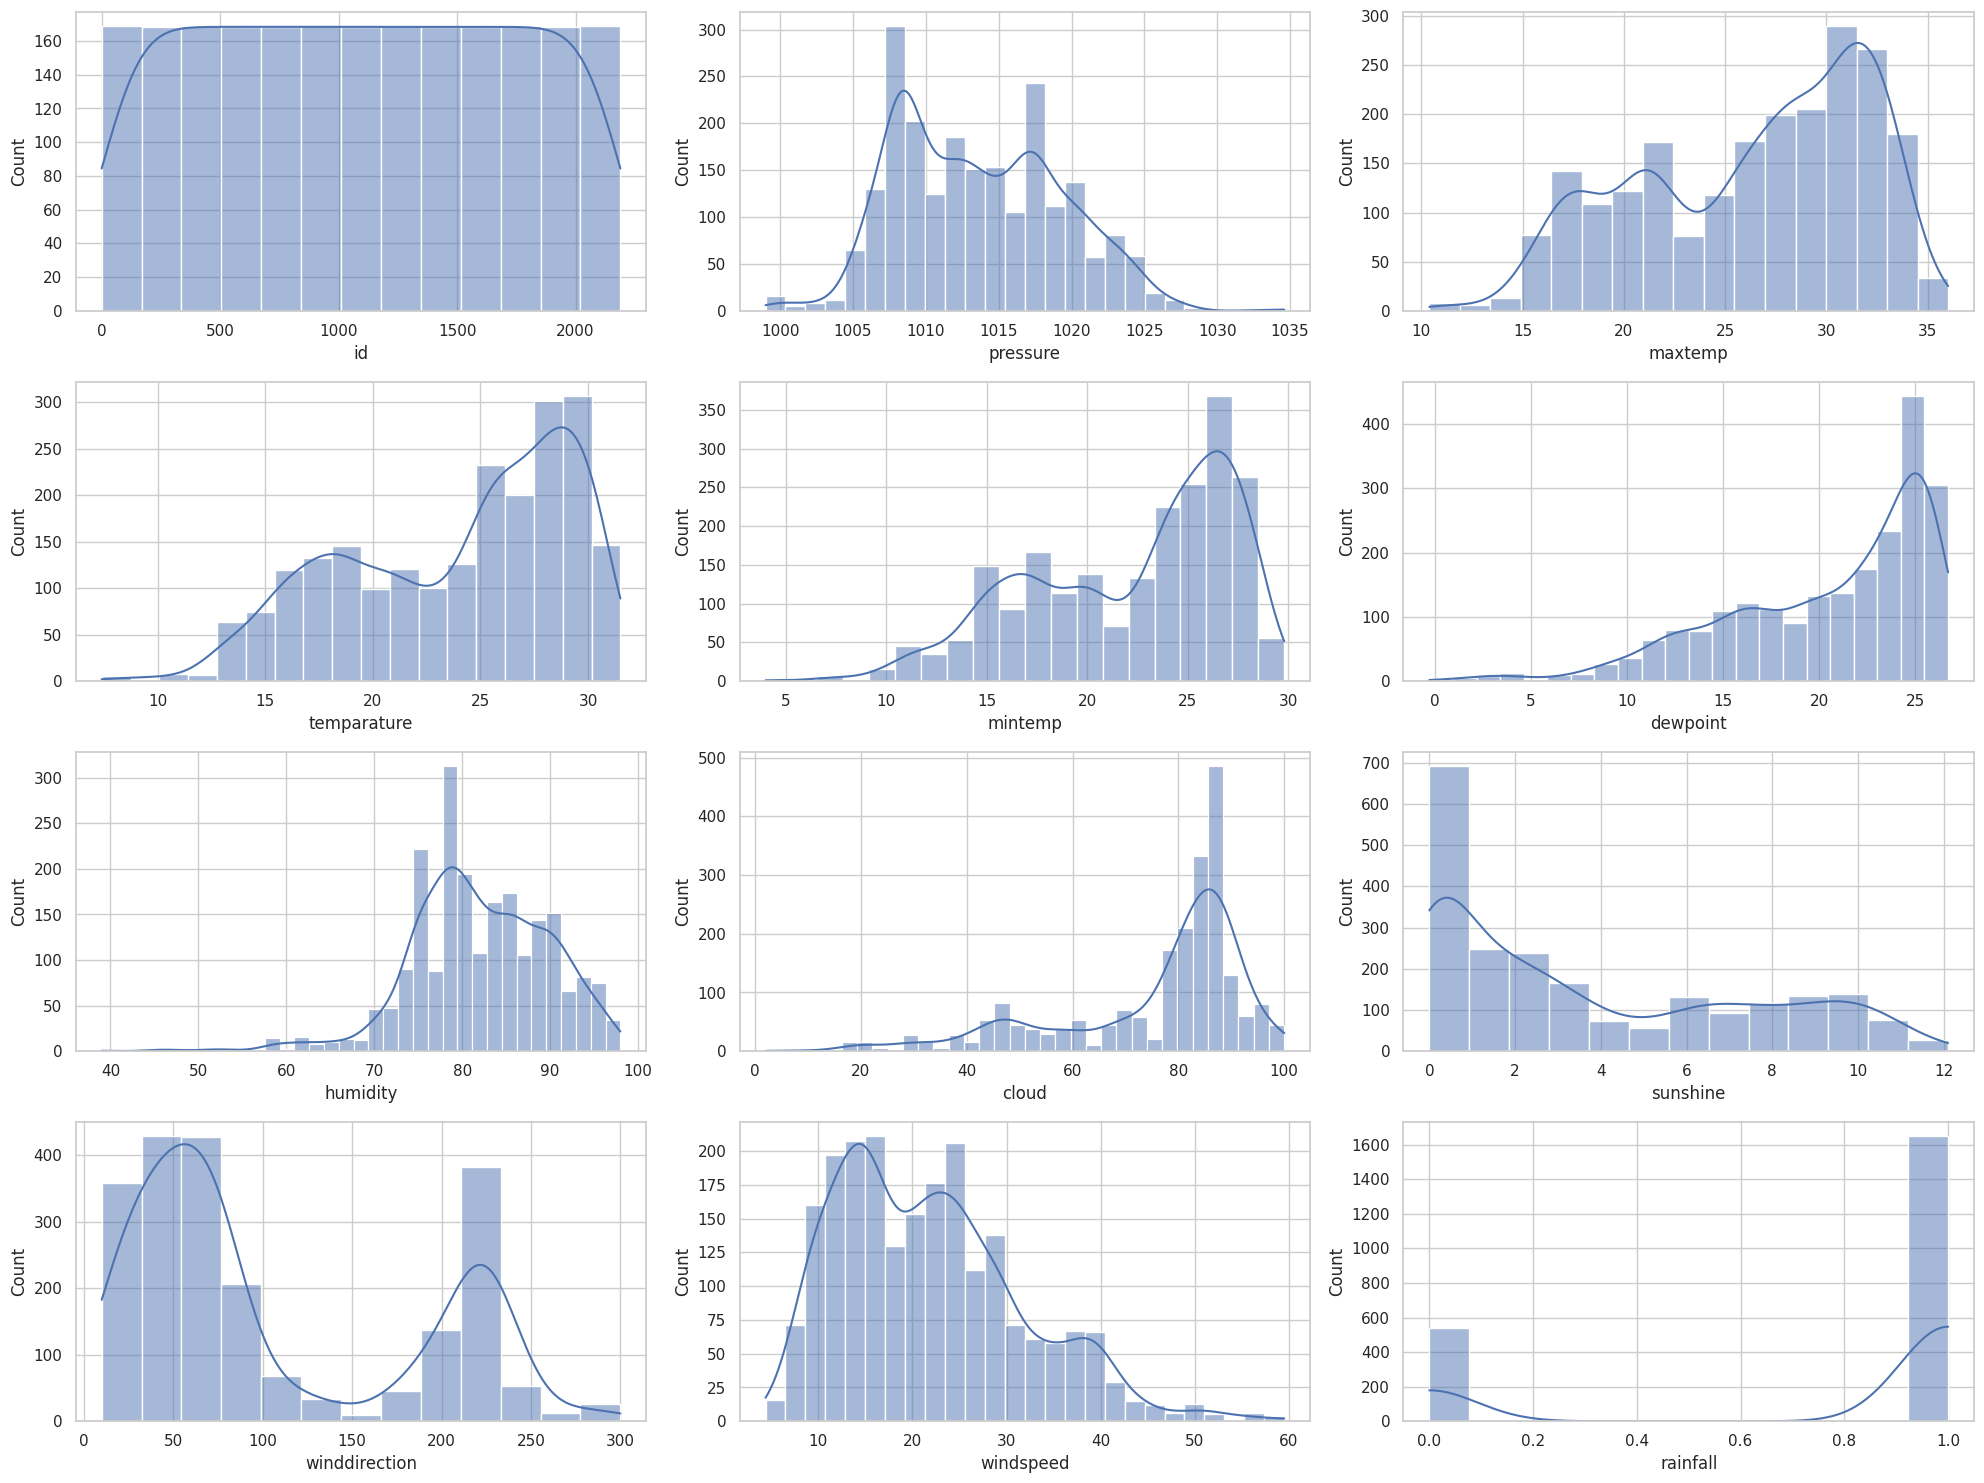

In [ ]:
plt.figure(figsize=(20,15))
for i,column in enumerate(['id', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],1):
  plt.subplot(4,3,i)
  sns.histplot(rainfall_data[column],kde=True)
plt.tight_layout()
plt.show()

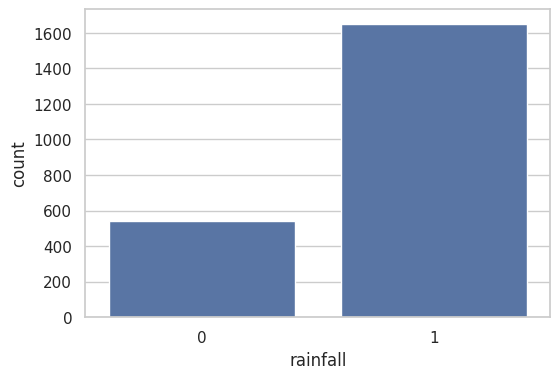

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=rainfall_data)
plt.title=("Rainfall Dist.")
plt.show()

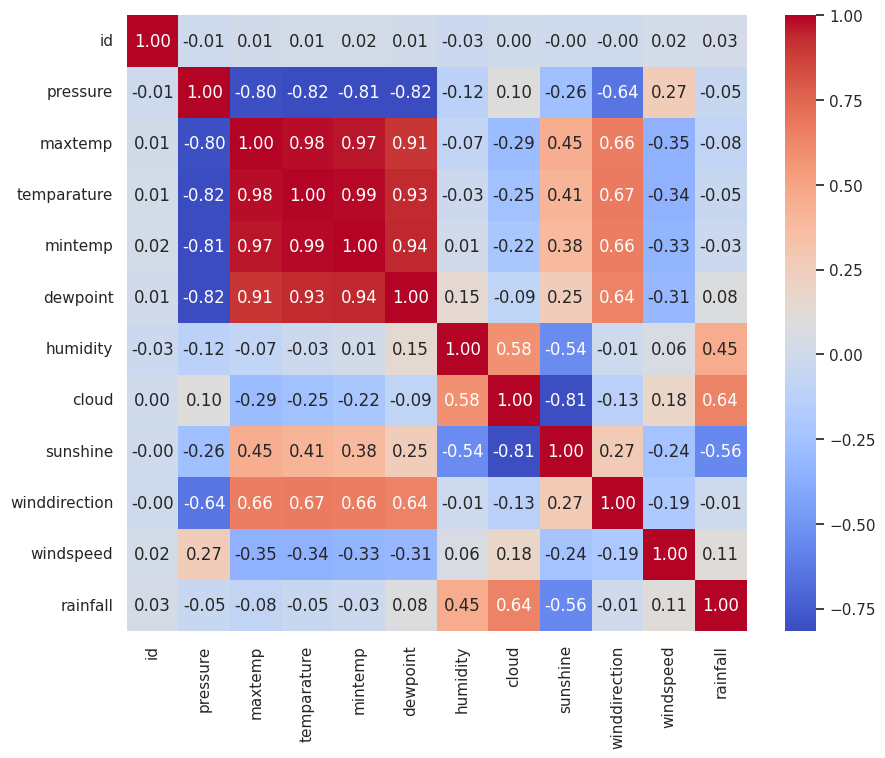

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(rainfall_data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

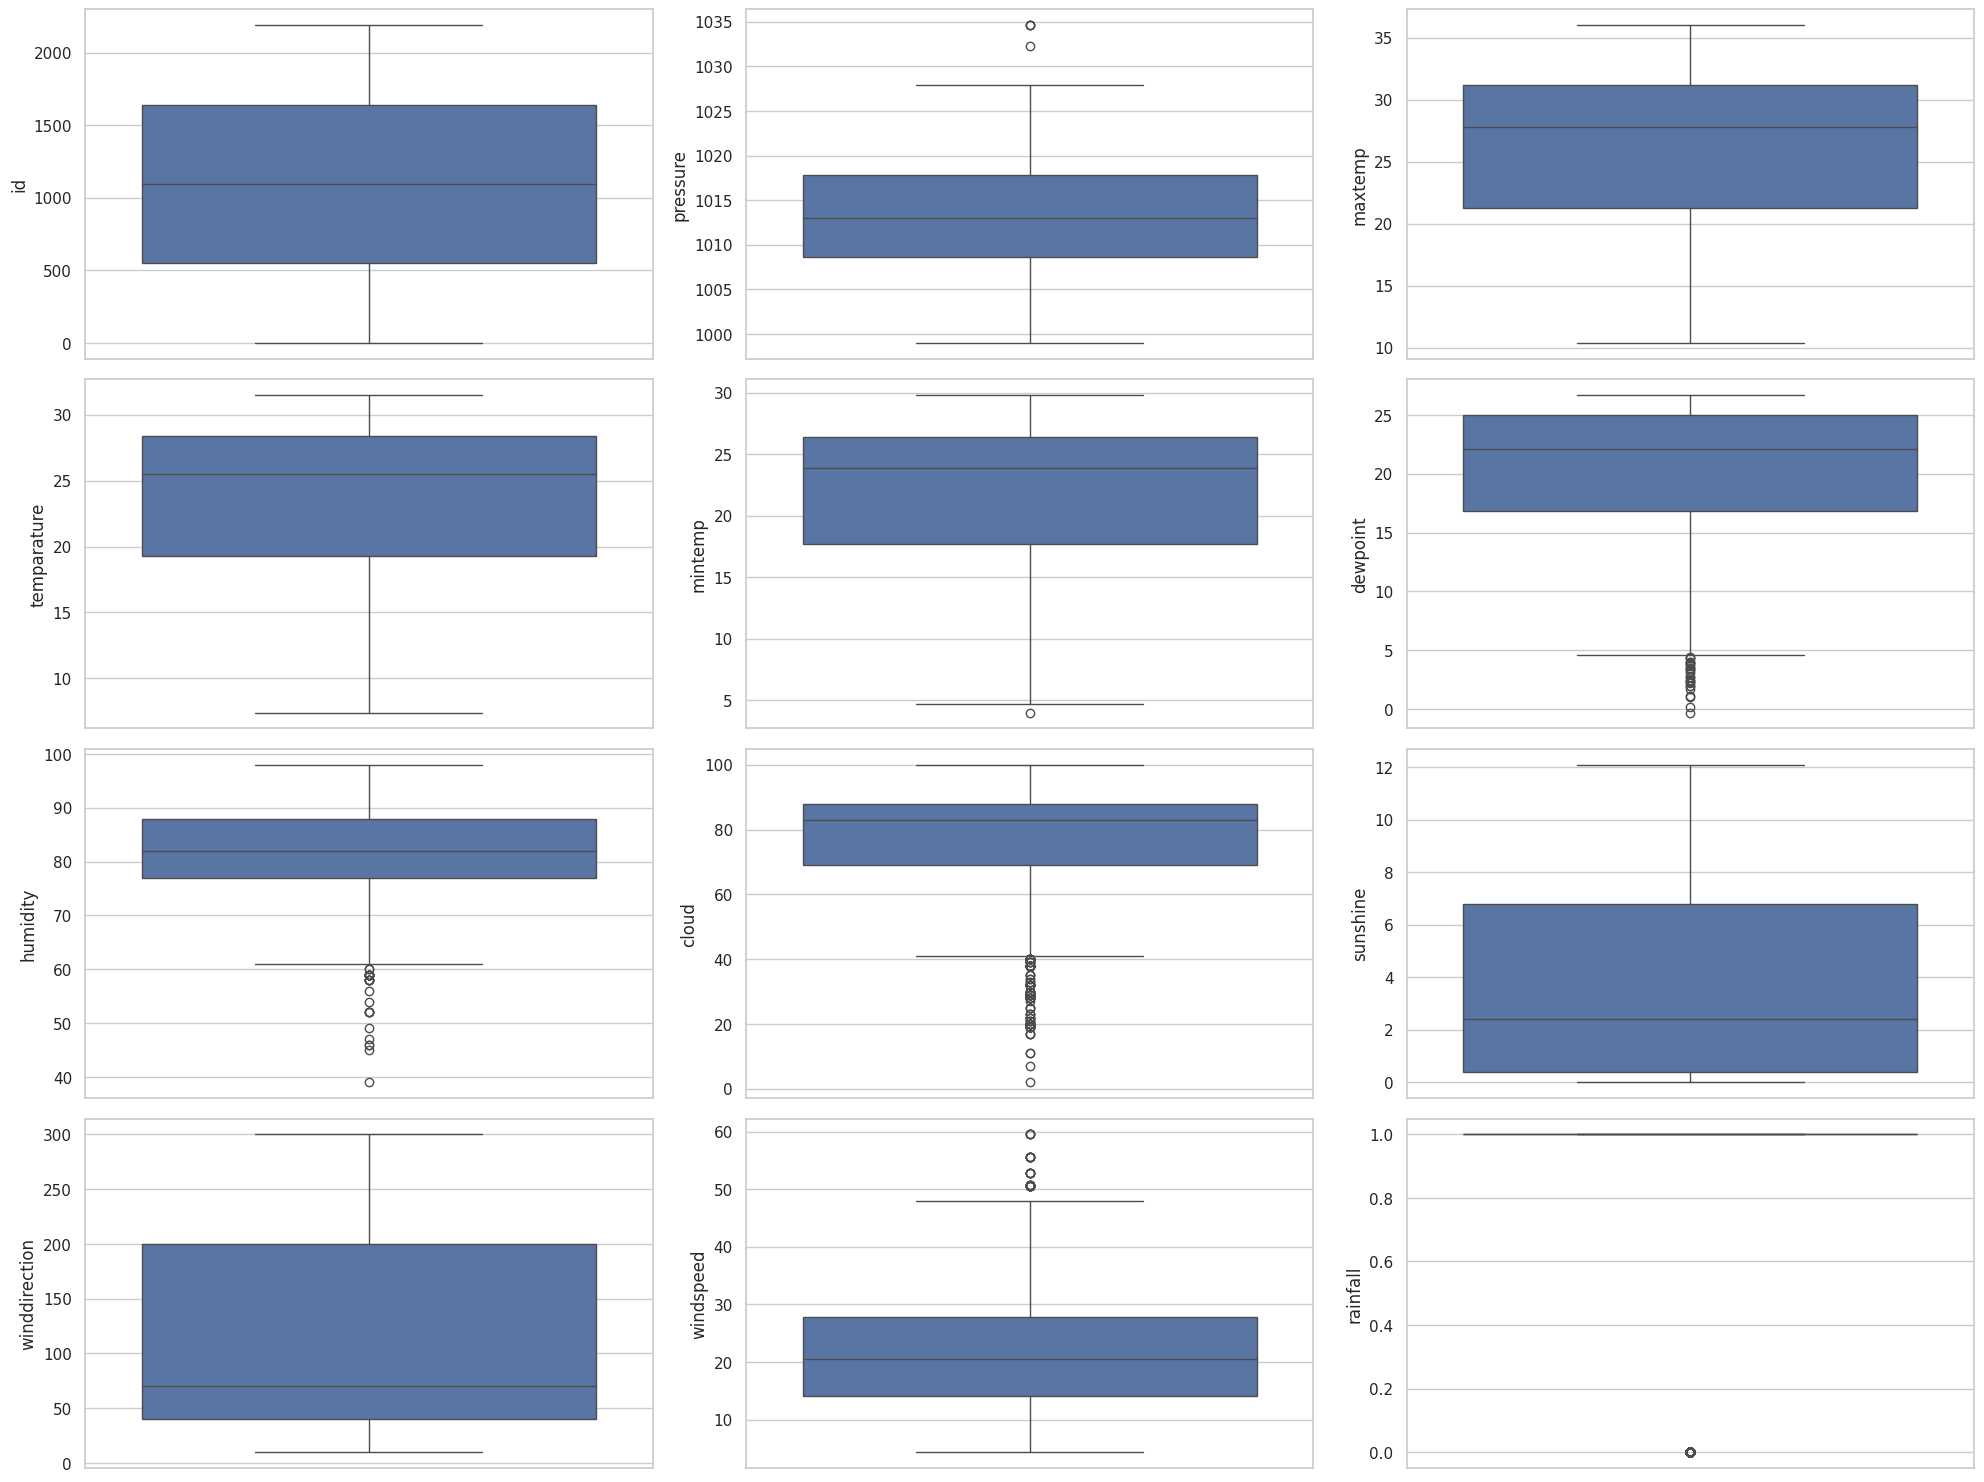

In [ ]:
plt.figure(figsize=(20,15))
for i,column in enumerate(['id', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],1):
  plt.subplot(4,3,i)
  sns.boxplot(rainfall_data[column])
plt.tight_layout()
plt.show()

In [ ]:
rainfall_data = rainfall_data.drop(columns=['maxtemp','mintemp','dewpoint'])

In [ ]:
print(rainfall_data["rainfall"].value_counts())

rainfall
1    1650
0     540
Name: count, dtype: int64


In [ ]:
rainfall_data.columns

Index(['id', 'pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

In [ ]:
df_major = rainfall_data[rainfall_data["rainfall"]==1]
df_minor = rainfall_data[rainfall_data["rainfall"]==0]

In [ ]:
print(df_major.shape)
print(df_minor.shape)

(1650, 9)
(540, 9)


In [ ]:
df_major_ds = resample(df_major,replace=False,n_samples=len(df_minor),random_state=42)

In [ ]:
df_major_ds.shape

(540, 9)

In [ ]:
df_ds = pd.concat([df_major_ds,df_minor])
df_ds.shape

(1080, 9)

In [ ]:
df_ds.head()

,id,pressure,temparature,humidity,cloud,sunshine,winddirection,windspeed,rainfall
658,658,1017.8,24.7,85.0,88.0,2.7,50.0,39.5,1
87,87,1012.2,25.9,86.0,84.0,1.6,70.0,17.5,1
1237,1237,1006.5,30.0,69.0,70.0,6.9,220.0,23.9,1
657,657,1012.6,26.5,84.0,72.0,6.6,30.0,25.0,1
28,28,1019.9,20.9,86.0,79.0,0.6,50.0,21.4,1


In [ ]:
df_ds["rainfall"].value_counts()

,count
rainfall,
1,540
0,540


In [ ]:
X = df_ds.drop(columns=["rainfall"])
y = df_ds["rainfall"]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
rf_m = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],     # number of trees
    'max_depth': [None, 10, 20, 30],     # maximum depth of trees
    'min_samples_split': [2, 5, 10],     # minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],       # minimum samples required at a leaf node
    'max_features':["sqrt","log2"]
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_m,
                           param_grid=param_grid_rf,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_rf_m = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
cvs = cross_val_score(best_rf_m,X_train,y_train,cv=5)
print(cvs)
print(np.mean(cvs))

[0.86127168 0.88439306 0.82080925 0.84393064 0.83139535]
0.8483599946229331


In [ ]:
y_prediction = best_rf_m.predict(X_test)
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))
print(accuracy_score(y_test,y_prediction))

[[79 25]
 [19 93]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       104
           1       0.79      0.83      0.81       112

    accuracy                           0.80       216
   macro avg       0.80      0.79      0.80       216
weighted avg       0.80      0.80      0.80       216

0.7962962962962963


In [ ]:
X.columns.tolist()

['id',
 'pressure',
 'temparature',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed']

In [ ]:
model = {
    "model": best_rf_m,
    "feature_names": X.columns.tolist()
}
with open("model.pkl","wb") as f:
  pickle.dump(model,f)

In [ ]:
# using the model for prediction
import pickle
import pandas as pd
test = pd.read_csv("/content/test.csv")
test

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [ ]:
test  = test.drop(columns=["maxtemp","mintemp","dewpoint","day"])

KeyError: "['maxtemp', 'mintemp', 'dewpoint', 'day'] not found in axis"

In [ ]:
test

,id,pressure,temparature,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1019.5,15.8,96.0,99.0,0.0,50.0,24.3
1,2191,1016.5,16.5,97.0,99.0,0.0,50.0,35.3
2,2192,1023.9,10.4,86.0,96.0,0.0,40.0,16.9
3,2193,1022.9,17.3,75.0,45.0,7.1,20.0,50.6
4,2194,1022.2,13.8,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...
725,2915,1020.8,17.6,96.0,95.0,0.0,20.0,34.3
726,2916,1011.7,18.1,78.0,80.0,1.6,40.0,25.2
727,2917,1022.7,18.5,92.0,96.0,0.0,50.0,21.9
728,2918,1014.4,20.0,94.0,93.0,0.0,50.0,39.5


In [ ]:
test.shape


(730, 8)

In [ ]:
ids= test['id']

In [ ]:
with open('model.pkl', 'rb') as f:
    data = pickle.load(f)
    model = data['model']

In [ ]:
X_test = test.drop(['id'], axis=1)

In [ ]:
predictions = model.predict(test)

In [ ]:
submission = pd.DataFrame({
    'id': test['id'],
    'rainfall': predictions
})

In [ ]:
submission.to_csv('submission.csv', index=False)
print("✅ submission.csv created successfully")

✅ submission.csv created successfully


In [ ]:
train_data = pd.read_csv("/content/train.csv")

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
X = train_data.drop(columns=['rainfall', 'id'], errors='ignore')
y = train_data['rainfall']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.8470


In [ ]:
# Load test data
test_df = pd.read_csv('test.csv')
X_test = test_df.drop(columns=['id'], errors='ignore')

# Predict rainfall
test_predictions = xgb_model.predict(X_test)

# Save submission
submission = pd.DataFrame({
    'id': test_df['id'],
    'rainfall': test_predictions
})
submission.to_csv('xgb_submission.csv', index=False)
print("✅ xgb_submission.csv created successfully!")

✅ xgb_submission.csv created successfully!


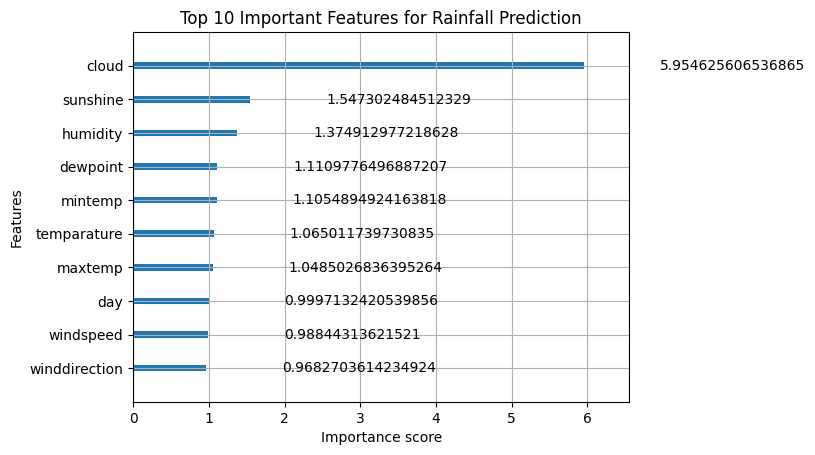

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features for Rainfall Prediction")
plt.show()